<a href="https://colab.research.google.com/github/krylov-sergey-sergeevich/ML-Practice/blob/main/EDA%20-%20%D0%A0%D0%B0%D0%B7%D0%B2%D0%B5%D0%B4%D0%BE%D1%87%D0%BD%D1%8B%D0%B9%20%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Разведочный анализ данных

Это задание посвящено изучению данных и построению различных визуализаций.  
Наша цель - провести **разведочный анализ данных**, чтобы исследовать поведение данных и выявить в них закономерности.

Мы будем работать с датассетом пассажиров [Титаника](https://en.wikipedia.org/wiki/Titanic).

Классическая задача, решаемая на этих данных: предсказать, выжил пассажир или нет по его характеристикам.  
То есть целевая переменная - столбец `Survived`.

Цели:
* познакомиться с библиотекой `seaborn`
* научиться делать различные визуализации
* заполнять пропуски в данных
* делать однофакторный анализ
* конструировать новые признаки

Бонус:
* придумаем свою модель на основе проведенного анализа и оценим ее качество.

## Подключение библиотек и загрузка данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt

Фиксируем `random_state` для воспроизводимости случайных значений.

In [2]:
RANDOM_STATE = 42

Загрузим данные.

In [7]:
data = pd.read_csv(
    "https://raw.githubusercontent.com/evgpat/edu_stepik_practical_ml/main/datasets/titanik.csv",
    sep=";"
    )

**Описание признаков**

- `Survived` — выжил данный пассажир или нет (*0* для умерших, *1* для выживших)
- `Pclass` — класс пассажира (*1* — высший, *2* — средний, *3* — низший)
- `Name` — имя
- `Sex` — пол
- `Age` — возраст
- `SibSp` — количество братьев, сестер, сводных братьев, сводных сестер, супругов на борту титаника
- `Parch` — количество родителей, детей (в том числе приемных) на борту титаника
- `Ticket` — номер билета
- `Fare` — плата за проезд
- `Cabin` — каюта
- `Embarked` — порт посадки (*C* — Шербур; *Q* — Квинстаун; *S* — Саутгемптон)

## Обзор данных

Посмотрим на *5* случайных объектов из датасета.

In [8]:
data.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
521,522,0,3,Vovk; Mr. Janko,male,22.0,0,0,349252,7.8958,NaN,S
635,636,1,2,Davis; Miss. Mary,female,28.0,0,0,237668,13.0000,NaN,S
52,53,1,1,Harper; Mrs. Henry Sleeper (Myna Haxtun),female,49.0,1,0,PC 17572,76.7292,D33,C
230,231,1,1,Harris; Mrs. Henry Birkhardt (Irene Wallach),female,35.0,1,0,36973,83.4750,C83,S
594,595,0,2,Chapman; Mr. John Henry,male,37.0,1,0,SC/AH 29037,26.0000,NaN,S


Выведите на экран размеры таблицы *Data*.

**Вопрос:** сколько объектов в данных?

In [10]:
len(data)

891

## Обработка признаков и однофакторный анализ

На данном этапе:

1) Найдем признаки, у которых есть пропущенные значения и обработаем эти пропущенные значения

2) Переведём категориальные признаки в числовые

Выведем на экран основные числовые характеристики числовых столбцов.  
Это можно сделать при помощи функции `describe`.

In [11]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


В строке *count* отображается количество непропущенных значений в каждом столбце.

Основные статистики можно посмотреть и по категориальным колонкам.  
Для этого в функцию `describe` нужно передать аргумент `include='object'`.

Сделайте это.

In [12]:
data.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,3,681,147,3
top,Braund; Mr. Owen Harris,male,347082,B96 B98,S
freq,1,574,7,4,644


**Вопрос:** в скольких категориальных колонках есть пропуски?

In [14]:
categorical_columns = data.select_dtypes(include=['object']).columns
categorical_columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [15]:
# Подсчет количества пропусков в категориальных колонках
missing_categorical_columns = data[categorical_columns].isnull().sum()
missing_categorical_columns

Name          0
Sex           0
Ticket        0
Cabin       687
Embarked      2
dtype: int64

In [17]:
# Подсчет количества категориальных колонок с пропусками
num_categorical_columns_with_missing_values = len(missing_categorical_columns[missing_categorical_columns > 0])
num_categorical_columns_with_missing_values

2

> Другой подход к решению: `data.isna().sum()`

### Столбец Sex

В столбце пол (`Sex`) три различных значения. Посмотрим на них.

In [18]:
data['Sex'].value_counts()

male       574
female     312
unknown      5
Name: Sex, dtype: int64

Удалим пассажиров неизвестного пола, так как их всего *5*.

In [19]:
data = data[data['Sex'] != 'unknown']

Проверьте, что строки с неизвестным полом исчезли.

In [20]:
data['Sex'].value_counts()

male      574
female    312
Name: Sex, dtype: int64

Признак `Sex` является категориальным, то есть содержит нечисловые значения. Для работы большинства алгоритмов необходимо переводить категории в числа.

Закодировать значения столбца с двумя категориями можно следующим образом. Пусть в воображаемом столбце *animal* есть два значения: *cat* и *dog*. Их можно перевести в *0* и *1* при помощи функции `map`:

`Data['animal'] = Data['animal'].map({'cat' : 1, 'dog' : 0})`


По аналогии закодируйте столбец `Sex` (*male* - *1*, *female* - *0*).

In [26]:
data['animal'] = None
data['animal'] = data['Sex'].map({'male' : 1, 'female' : 0})

In [27]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,animal
0,1,0,3,Braund; Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,Heikkinen; Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,Allen; Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,Montvila; Rev. Juozas,male,27.0,0,0,211536,13.0000,NaN,S,1
887,888,1,1,Graham; Miss. Margaret Edith,female,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston; Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,1,Behr; Mr. Karl Howell,male,26.0,0,0,111369,30.0000,C148,C,1


**Вопрос** посчитайте сумму значений в закодированном столбце `Sex`.

In [28]:
data['animal'].sum()

574

Посмотрим, как влияет пол на выживаемость.

<ipython-input-29-9cbd718726a1>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=data, palette='summer')


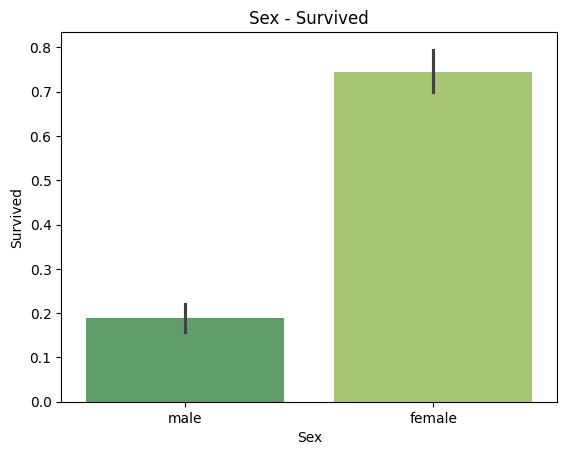

In [29]:
sns.barplot(x='Sex', y='Survived', data=data, palette='summer')
plt.title('Sex - Survived')
plt.show();

Гистограмму можно детализировать, добавив значение параметра `hue`.

### Столбец Pclass

Нарисуйте гистограмму выживаемости в зависимости от `Pclass`.  
Используйте `barplot`.

<ipython-input-33-97b843090f1c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=data, palette='summer')


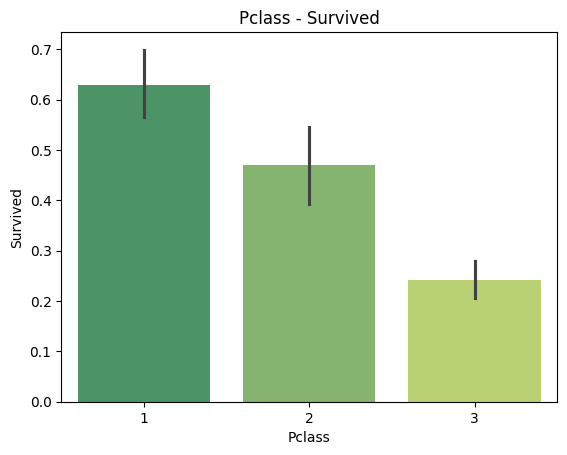

In [33]:
sns.barplot(x='Pclass', y='Survived', data=data, palette='summer')
plt.title('Pclass - Survived')
plt.show();

**Вопрос:** пассажиры из какого класса выживали чаще всего?

Посмотрим, как влияет пол человека и класс билета (`Pclass`) на выживаемость

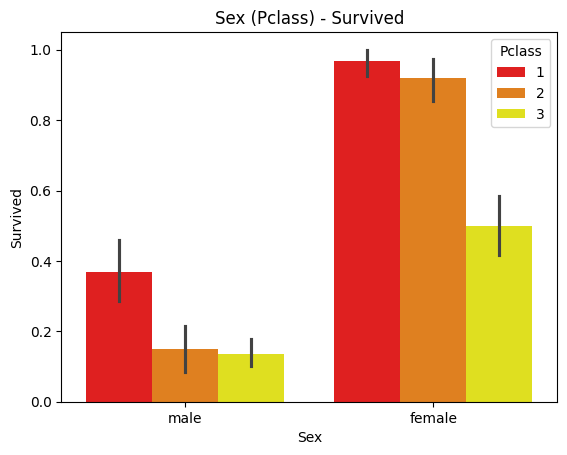

In [34]:
sns.barplot(x='Sex', y='Survived', hue='Pclass', data=data, palette='autumn')
plt.title('Sex (Pclass) - Survived')
plt.show();

### Столбец Embarked

**Вопрос** сколько различных значений принимает признак `Embarked`?

In [35]:
data['Embarked'].value_counts()

S    641
C    168
Q     75
Name: Embarked, dtype: int64

Пока что мы не обсуждали, как переводить в числа категориальные признаки с больше, чем двумя категориями.  
Поэтому давайте отбросим этот признак.

Сделайте это (вам пригодится метод [`drop`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html)).

In [36]:
# Удаление столбца 'Embarked'
data = data.drop('Embarked', axis=1)

### Столбец Age

Обработаем признак `Age`.

Мы помним, что в этом признаке много пропусков.

Заполним пропуски медианным значением `Age`.

In [37]:
median_age = data['Age'].median()

data['Age'].fillna(median_age, inplace=True)

Нарисуем распределение возраста пассажиров.

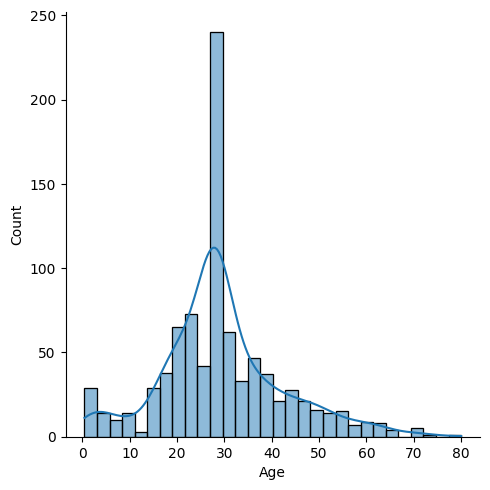

In [38]:
sns.displot(data['Age'], kde=True)
plt.show();

### Другие столбцы

Удалите признак `Fare`. Он сильно связан с признаком `Pclass`, поэтому нам не нужен.

In [39]:
# Удаление столбца 'Fare'
data = data.drop('Fare', axis=1)

In [40]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Cabin', 'animal'],
      dtype='object')

**Вопрос:** сколько на данный момент колонок в таблице `Data`?

In [41]:
len(data.columns)

11

In [42]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Cabin,animal
0,1,0,3,Braund; Mr. Owen Harris,male,22.0,1,0,A/5 21171,NaN,1
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,female,38.0,1,0,PC 17599,C85,0
2,3,1,3,Heikkinen; Miss. Laina,female,26.0,0,0,STON/O2. 3101282,NaN,0
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,C123,0
4,5,0,3,Allen; Mr. William Henry,male,35.0,0,0,373450,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,Montvila; Rev. Juozas,male,27.0,0,0,211536,NaN,1
887,888,1,1,Graham; Miss. Margaret Edith,female,19.0,0,0,112053,B42,0
888,889,0,3,"Johnston; Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,NaN,0
889,890,1,1,Behr; Mr. Karl Howell,male,26.0,0,0,111369,C148,1


Столбец `PassengerId` является категориальным и не несёт важной информации, удалите его.

Столбцы `Ticket`, `Name` и `Cabin` в этот раз нам также не понадобятся. Удалите и их.

In [43]:
data = data.drop(['PassengerId', 'Ticket', 'Name', 'Cabin'], axis=1)

После минимальной обработки данных у нас получилась следующая таблица:

In [44]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,animal
0,0,3,male,22.0,1,0,1
1,1,1,female,38.0,1,0,0
2,1,3,female,26.0,0,0,0
3,1,1,female,35.0,1,0,0
4,0,3,male,35.0,0,0,1


## Исследование признаков

Нарисуйте матрицу корреляций столбцов между собой.

<ipython-input-45-532254138203>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


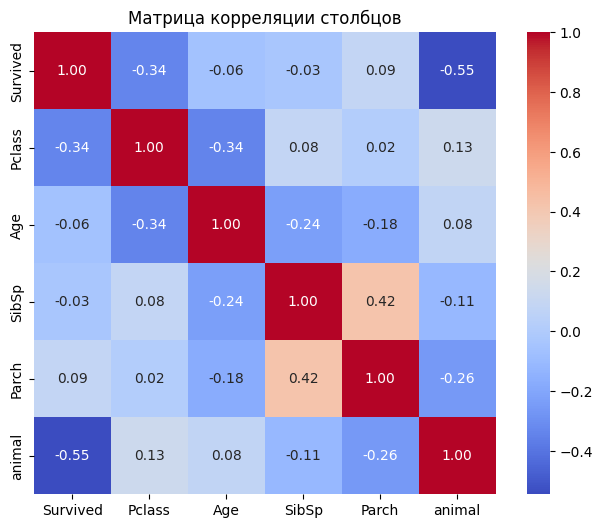

In [45]:
# Вычисление матрицы корреляции
correlation_matrix = data.corr()

# Создание тепловой карты
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Матрица корреляции столбцов')
plt.show()

**Вопрос:** какой столбец сильнее всего коррелирует с целевой переменной `Survived`?

Посмотрим на попарные зависимости некоторых признаков.

In [ ]:
g = sns.pairplot(
    Data,
    hue='Survived',
    palette = 'seismic',
    height=4,
    diag_kind = 'kde',
    diag_kws=dict(fill=True),
    plot_kws=dict(s=50)
    )

g.set(xticklabels=[]);

## Бонус

Мы не используем всю информацию о данных, в частности, не используем текстовые данные. Также из матрицы корреляций мы видим, что признаки `Parch` и `SibSp` слабо коррелируют с выживаемостью (`Survived`). Можно сконструировать новые признаки, чтобы решить эти вопросы.

Попробуйте сделать следующее.

1) Создайте признак `NameLen` и запишите в него длину имени (`Name`).

2) Создайте признак `FamilySize`, равный *Parch + SibSp + 1*. Зачем добавлять 1?

3) Создайте признак `IsAlone`, который показывает, путешествовал человек один или с семьей.

Посмотрите, как коррелируют новые признаки со столбцом `Survived`.

In [ ]:
# ваш код здесь

Можно извлечь и другую полезную информацию из данных путём конструирования новых признаков.

Придумайте ещё новые осмысленные признаки. Проверьте, как они коррелируют с выживаемостью.

In [ ]:
# ваш код здесь

Мы провели  однофакторный анализ данных и увидели, какие признаки сильно влияют на выживаемость, а какие нет.

Мы видим, что больше всего на выживаемость влияет пол пассажира.


### Наша собственная модель

Напишем свою модель, предсказывающую выживаемость только по признаку `Sex`.

In [ ]:
def prediction(x):
    if x.Sex == 1:
        return 0
    return 1

Посчитаем долю правильных ответов нашей модели.

In [ ]:
from sklearn.metrics import accuracy_score

pred = Data.apply(lambda x: prediction(x), axis=1)

accuracy_score(Data['Survived'], pred)